In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('UTSEUS-anjuke-real-estate.csv')

In [5]:
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


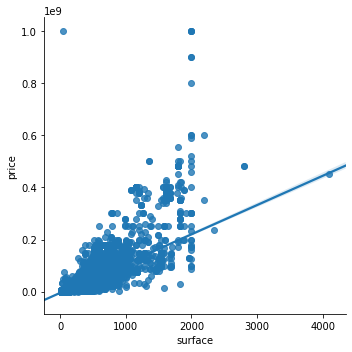

In [6]:
sns.lmplot(x='surface', y='price', data=df)

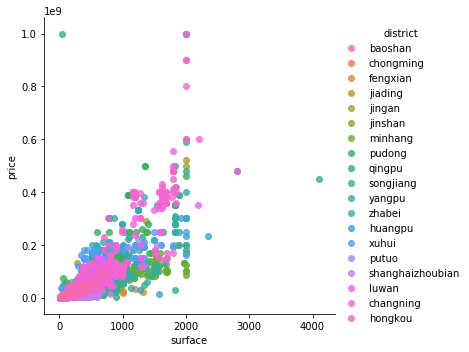

In [7]:
sns.lmplot(x='surface', y='price', data=df,
           fit_reg=False,
           hue='district')  

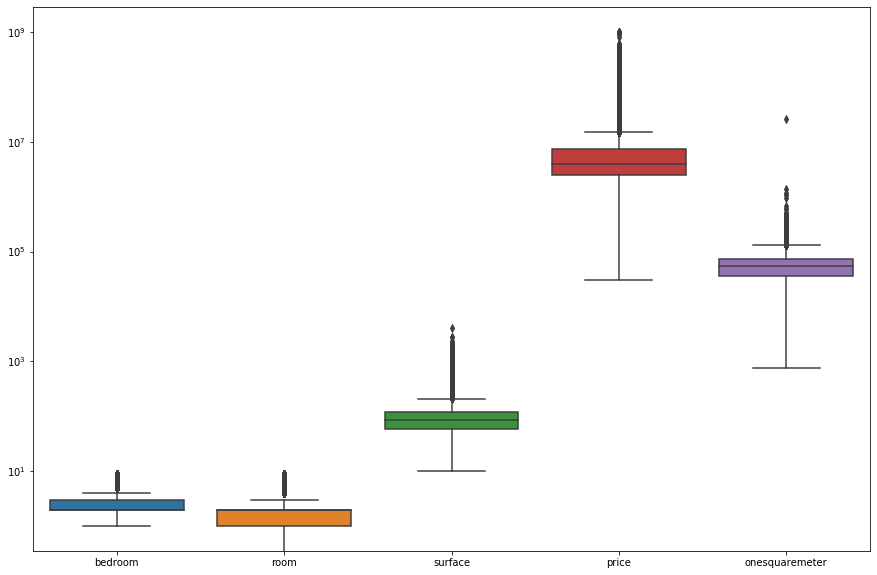

In [9]:
some_df = df.drop(['longitude', 'latitude', 'done'], axis=1)
plt.figure(figsize=(15,10))
sns.boxplot(data=some_df)
plt.yscale('log')

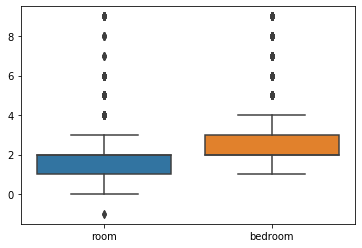

In [9]:
sns.boxplot(data=df[['room','bedroom']])

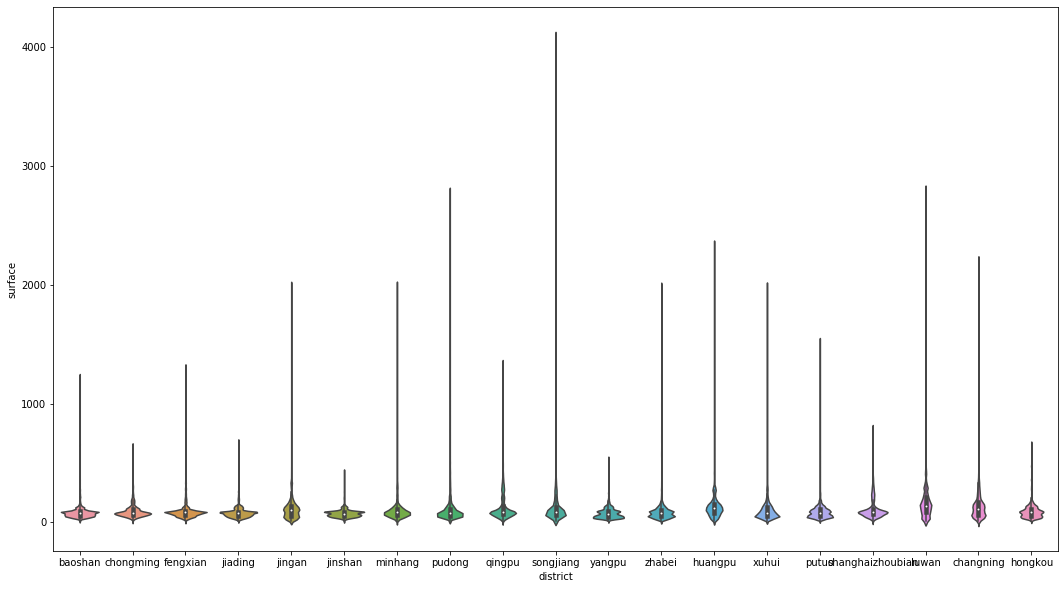

In [11]:
plt.figure(figsize=(18,10))
sns.violinplot(x='district', y='surface', data=df)

In [13]:
import numpy as np

In [14]:
df['abc']=np.random.uniform(0,1,len(df))<=0.001
df=df[df['abc']==True]
len(df)

469

(0, 200)

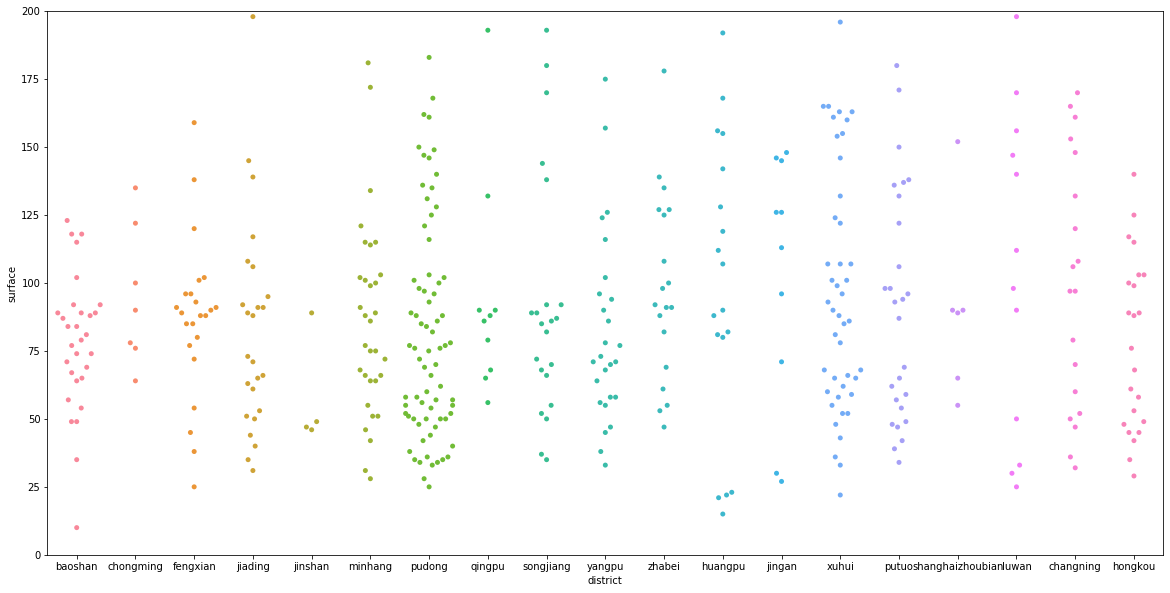

In [16]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='district', y='surface', data=df)
plt.ylim(-0, 200)

Text(0.5, 1.0, 'Distribution of flat surfaces by district')

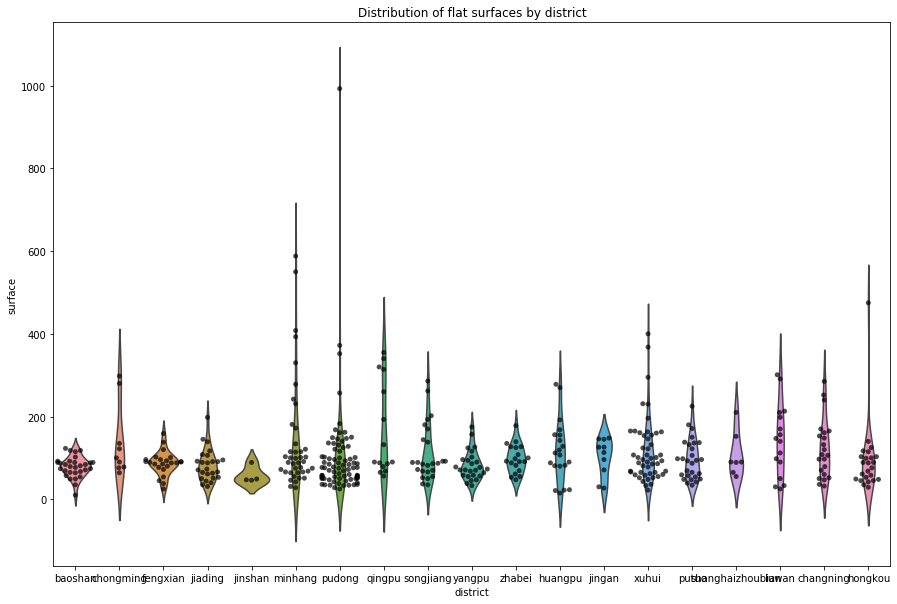

In [17]:
plt.figure(figsize=(15,10))
 
sns.violinplot(x='district',
               y='surface', 
               data=df, 
               inner=None)
 
sns.swarmplot(x='district', 
              y='surface', 
              data=df, 
              color='k',
              alpha=0.7)

plt.title('Distribution of flat surfaces by district')

In [18]:
stats_df = df.drop(['id', 'longitude','tags','latitude','done','abc'], axis=1)

In [19]:
stats_df.head()

,address,bedroom,room,surface,price,onesquaremeter,district,neighborhood
3972,宝山-高境 呼玛四村,3,1,84.0,4250000.0,50595.238095,baoshan,gaojing
6554,宝山-共富 宝启公寓,3,1,84.0,3200000.0,38095.238095,baoshan,gongfu
6758,宝山-共富 成亿宝盛家苑,2,1,74.0,3200000.0,43243.243243,baoshan,gongfu
8364,宝山-共康 中环国际公寓(551弄),2,2,89.0,5200000.0,58426.966292,baoshan,gongkang
10328,宝山-共康 共康公寓,2,2,89.0,4980000.0,55955.056180,baoshan,gongkang


In [20]:
melted_df = pd.melt(stats_df, 
                    id_vars=["surface","address","district","neighborhood","price","onesquaremeter"], # Variables to keep
                    var_name="room_number") # Name of melted variable
melted_df.head()

,surface,address,district,neighborhood,price,onesquaremeter,room_number,value
0,84.0,宝山-高境 呼玛四村,baoshan,gaojing,4250000.0,50595.238095,bedroom,3
1,84.0,宝山-共富 宝启公寓,baoshan,gongfu,3200000.0,38095.238095,bedroom,3
2,74.0,宝山-共富 成亿宝盛家苑,baoshan,gongfu,3200000.0,43243.243243,bedroom,2
3,89.0,宝山-共康 中环国际公寓(551弄),baoshan,gongkang,5200000.0,58426.966292,bedroom,2
4,89.0,宝山-共康 共康公寓,baoshan,gongkang,4980000.0,55955.056180,bedroom,2


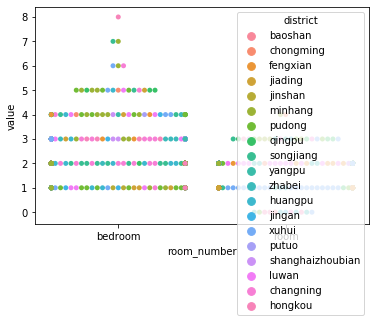

In [21]:
sns.swarmplot(x='room_number', y='value', data=melted_df, 
              hue='district')

C:\Users\mario\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


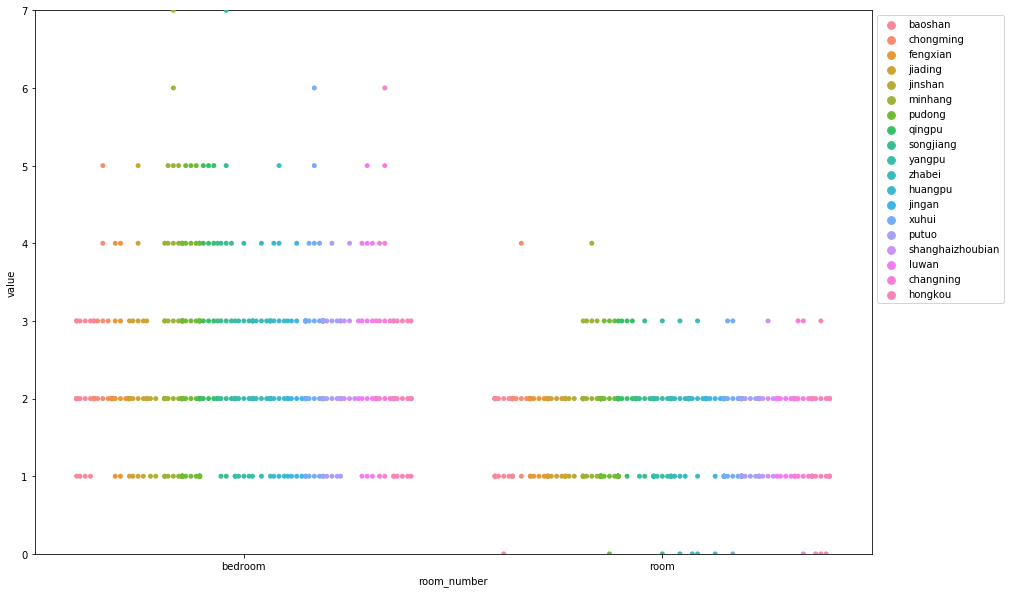

In [22]:
plt.figure(figsize=(15,10))
 
sns.swarmplot(x='room_number', 
              y='value', 
              data=melted_df, 
              hue='district', 
              split=True) 
 
plt.ylim(0, 7)
 
plt.legend(bbox_to_anchor=(1, 1), loc=2)

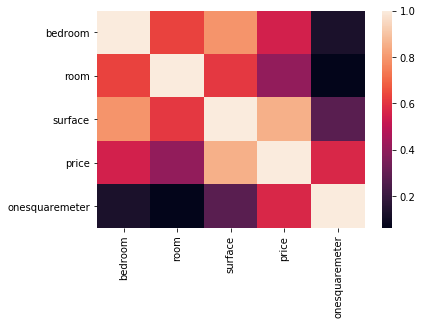

In [23]:
corr = stats_df.corr()
 
sns.heatmap(corr)

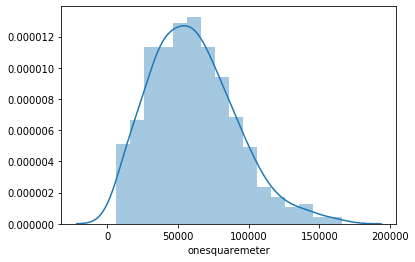

In [24]:
sns.distplot(df.onesquaremeter)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

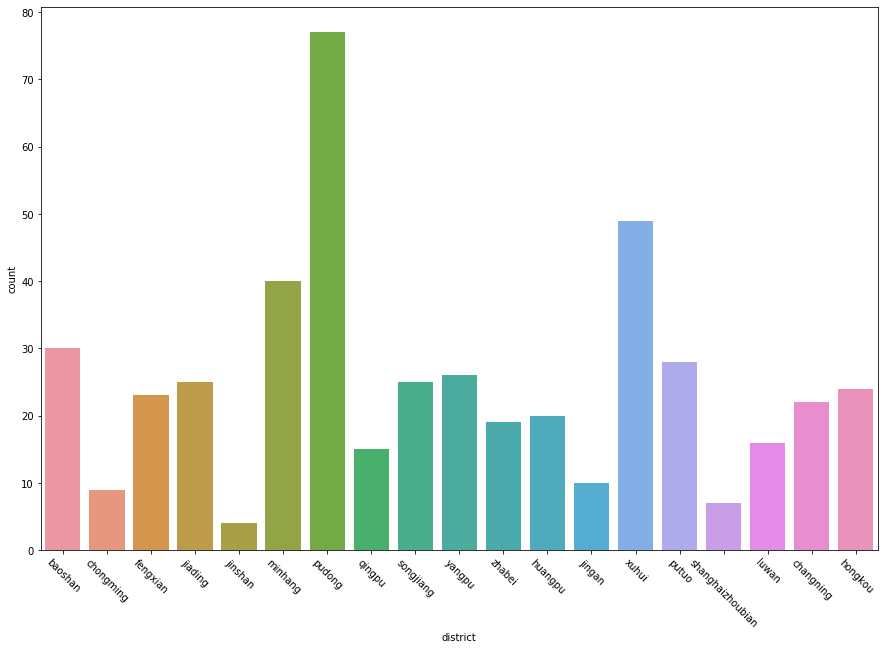

In [25]:
plt.figure(figsize=(15,10))

sns.countplot(x='district', data=df)
 
plt.xticks(rotation=-45)


C:\Users\mario\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

<Figure size 1080x720 with 0 Axes>

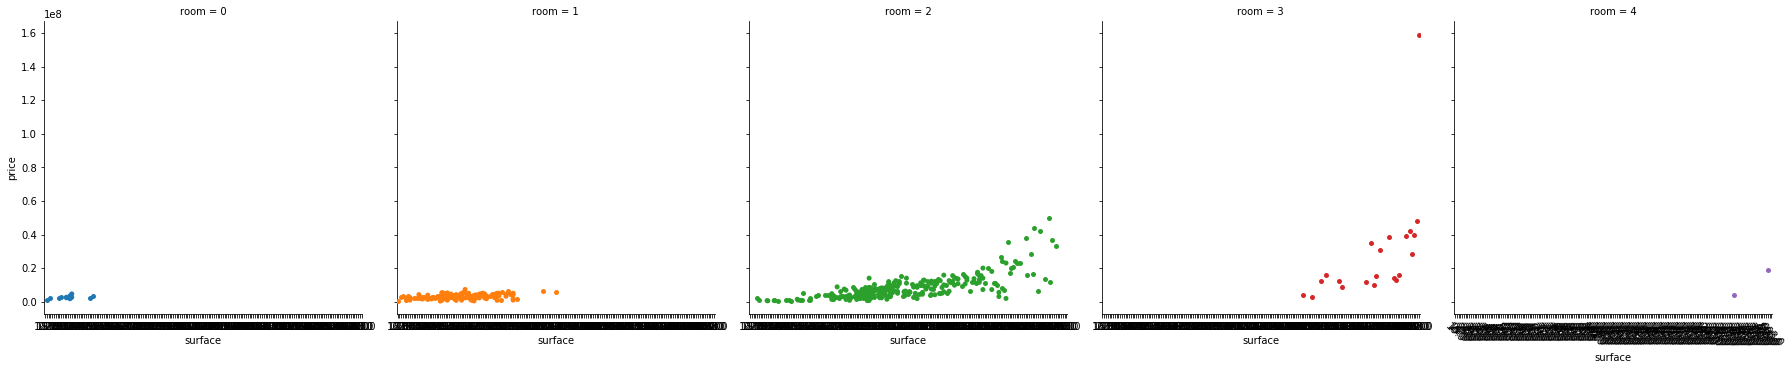

In [26]:
plt.figure(figsize=(15,10))
g = sns.factorplot(x='surface', 
                   y='price', 
                   data=df, 
                   hue='room',  # Color by stage
                   col='room',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
plt.xticks(rotation=-45)

(-2000000, 15000000)

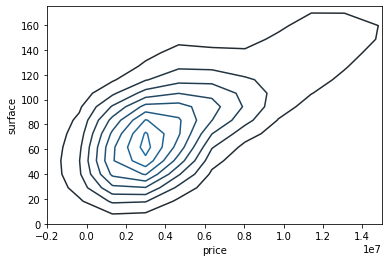

In [27]:
sns.kdeplot(df.price, df.surface)
plt.ylim(0,175)
plt.xlim(-2000000,15000000)


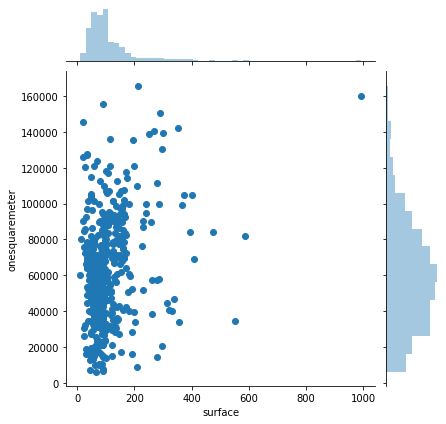

In [28]:
sns.jointplot(x='surface', y='onesquaremeter', data=df)